In [1]:
#!pip install seaborn
#!pip install pydotplus
#!pip install joblib

In [2]:
import pandas as pd

In [3]:
X = pd.read_csv("C:/Users/ROG STRIX/Desktop/IOT project/cropdata.csv")
X.head()

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
0,Wheat,10,400,30,15,0
1,Wheat,7,200,30,32,0
2,Wheat,9,300,21,28,0
3,Wheat,3,500,40,22,0
4,Wheat,2,700,23,34,0


In [4]:
unique_crop_types = X['CropType'].unique()

print(len(unique_crop_types))
unique_crop_types

9


array(['Wheat', 'Groundnuts', 'Garden Flowers', 'Maize', 'Paddy',
       'Potato', 'Pulse', 'Sugarcane', 'Coffee'], dtype=object)

In [5]:
X_train_Id = X.iloc[:, 0]
y = X.iloc[:, -1]
X = X.iloc[:, 0:-1]
print(X_train_Id.head())
print(y.head())
X.head()

0    Wheat
1    Wheat
2    Wheat
3    Wheat
4    Wheat
Name: CropType, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: Irrigation, dtype: int64


,CropType,CropDays,SoilMoisture,temperature,Humidity
0,Wheat,10,400,30,15
1,Wheat,7,200,30,32
2,Wheat,9,300,21,28
3,Wheat,3,500,40,22
4,Wheat,2,700,23,34


In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Irrigation, dtype: int64

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['CropDays', 'SoilMoisture', 'temperature', 'Humidity']
categorical_columns = ['CropType']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),  
        ('cat', OrdinalEncoder(), categorical_columns)
    ])

transformed_data = preprocessor.fit_transform(X)
print(transformed_data)
X_transformed = pd.DataFrame(transformed_data, columns=numerical_columns + categorical_columns)

X_transformed.head()

[[0.0430622  0.32183908 0.57142857 0.05405405 8.        ]
 [0.02870813 0.09195402 0.57142857 0.28378378 8.        ]
 [0.03827751 0.20689655 0.25       0.22972973 8.        ]
 ...
 [0.45933014 0.31954023 0.39285714 0.09459459 0.        ]
 [0.46889952 0.64137931 0.35714286 0.09459459 0.        ]
 [0.4784689  0.09310345 0.25       0.04054054 0.        ]]


,CropDays,SoilMoisture,temperature,Humidity,CropType
0,0.043062,0.321839,0.571429,0.054054,8.0
1,0.028708,0.091954,0.571429,0.283784,8.0
2,0.038278,0.206897,0.250000,0.229730,8.0
3,0.009569,0.436782,0.928571,0.148649,8.0
4,0.004785,0.666667,0.321429,0.310811,8.0


In [10]:
unique_crop_types = X_transformed['CropType'].unique()

print(len(unique_crop_types))
unique_crop_types

9


array([8., 2., 1., 3., 4., 5., 6., 7., 0.])

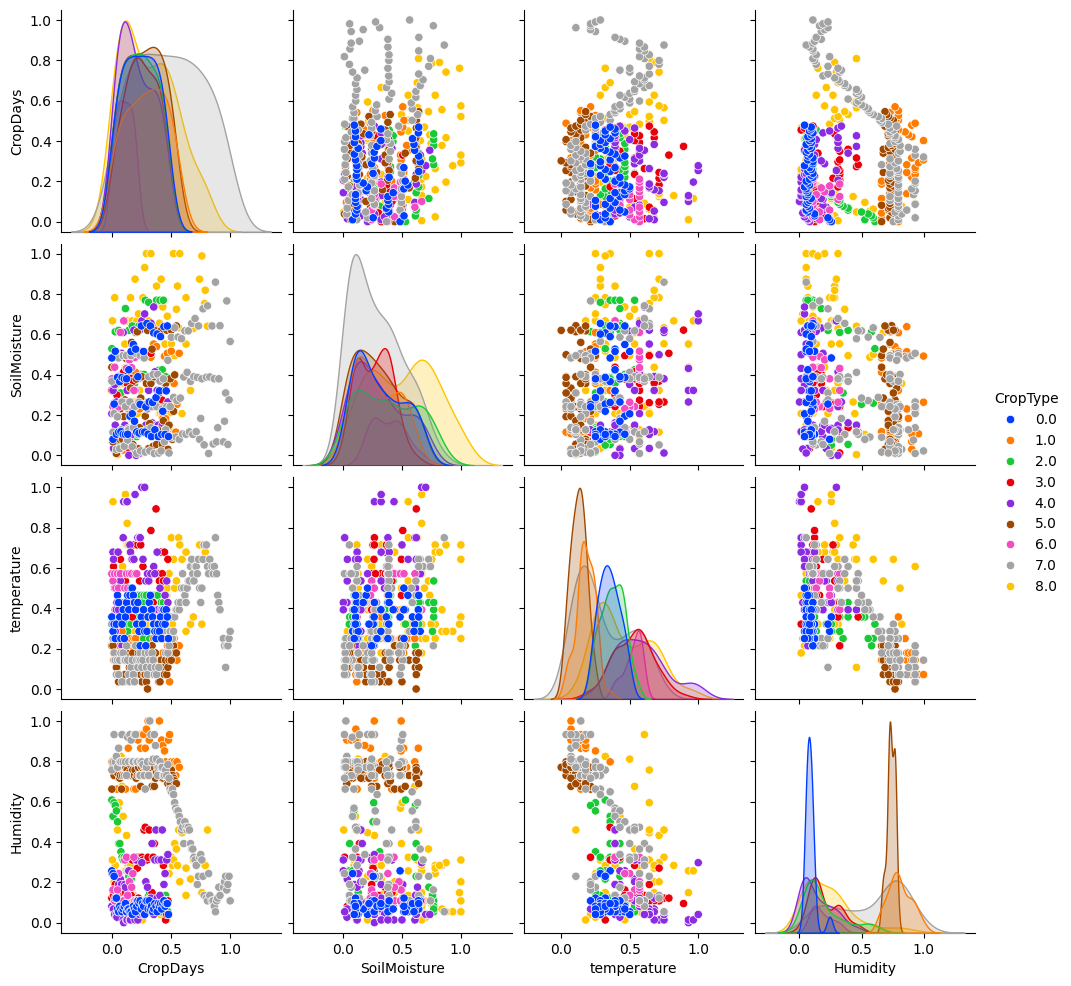

In [11]:
import seaborn as sns
sns.pairplot(X_transformed, hue='CropType', palette="bright")

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [41]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2', ],
              'splitter' : ['best', 'random'],
              'ccp_alpha': [10, 1, 0.1, .01, .001, .0001],
              'max_depth' : [7,8,9,10,11, 12],
              'criterion' :['gini', 'entropy', 'log_loss'],
              'min_samples_leaf' : [2,3,4,5,6,7],
              'random_state' : [1, 2],
              'max_features': [3, 4, 5, 6, 7, 8]
             }
tree_class = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_class, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_transformed, y)

Fitting 5 folds for each of 15552 candidates, totalling 77760 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 8, 9, 10, 11, 12],
                         'max_features': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'random_state': [1, 2],
                         'splitter': ['best', 'random']},
             verbose=True)

In [42]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features=4, min_samples_leaf=5, random_state=1)


In [13]:
clf = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features=4, min_samples_leaf=5, random_state=1)
scores = cross_val_score(clf, X_transformed, y, cv=5)
scores

array([0.71287129, 0.86      , 0.94      , 0.91      , 0.96      ])

In [23]:
import pandas as pd

# Create a list of data
data = scores

# Create a DataFrame
df = pd.DataFrame(data, columns=["Validation scores"])

# Print the DataFrame
df


,Validation scores
0,0.712871
1,0.860000
2,0.940000
3,0.910000
4,0.960000


In [12]:
clf = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=11,
                       max_features=4, min_samples_leaf=5, random_state=1)
scores = cross_val_score(clf, X_transformed, y, cv=5)
scores

array([0.71287129, 0.86      , 0.94      , 0.91      , 0.96      ])

In [14]:
clf = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=16,
                       max_features=5, min_samples_leaf=3, random_state=2,
                       splitter='random')
scores = cross_val_score(clf, X_transformed, y, cv=5)
scores

array([0.74257426, 0.83      , 0.9       , 0.85      , 0.91      ])

In [143]:
clf = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=18,
                       max_features=7, min_samples_leaf=2, random_state=1,
                       splitter='random')
scores = cross_val_score(clf, X_transformed, y, cv=5)
scores

array([0.73267327, 0.85      , 0.82      , 0.89      , 0.88      ])

In [16]:
clf = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=25,
                       max_features=10, min_samples_leaf=2, random_state=1,
                       splitter='random')
scores = cross_val_score(clf, X_transformed, y, cv=5)
scores

array([0.73267327, 0.85      , 0.82      , 0.89      , 0.88      ])

In [18]:
clf = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=29, max_features=27,
                       splitter='random')
scores = cross_val_score(clf, X_transformed, y, cv=5)
scores

array([0.75247525, 0.74      , 0.72      , 0.91      , 0.86      ])

In [44]:
clf.fit(X_transformed, y)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features=4, min_samples_leaf=5, random_state=1)

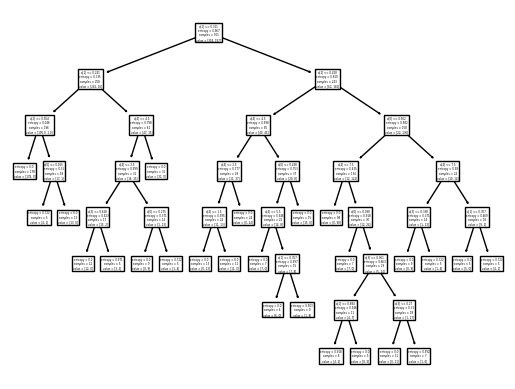

In [45]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2, random_state = 42)

In [15]:
dtree = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features=4, min_samples_leaf=5, random_state=1)
dtree.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features=4, min_samples_leaf=5, random_state=1)

In [16]:
y_pred = dtree.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9207920792079208

In [18]:
print(y_pred)

[0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1
 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1]


In [19]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [20]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

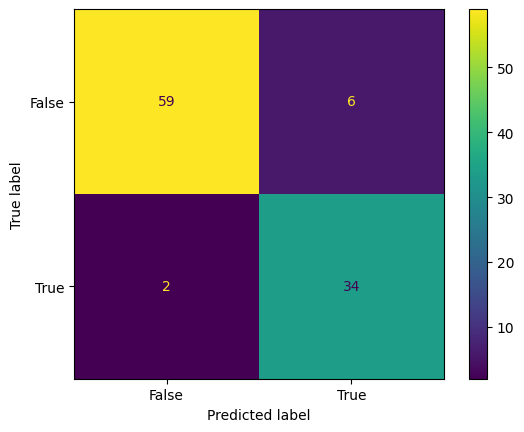

In [21]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.9207920792079208
Precision: 0.85
Recall (Sensitivity): 0.9444444444444444
F1-Score: 0.8947368421052632


In [78]:
import joblib

In [79]:
joblib.dump(dtree, 'decision_tree.joblib')

['decision_tree.joblib']

In [81]:
x_test.head()

,CropDays,SoilMoisture,temperature,Humidity,CropType
362,29.0,186.0,18.0,79.0,7.0
73,156.0,880.0,34.0,33.0,8.0
375,54.0,222.0,17.0,70.0,7.0
155,72.0,210.0,18.0,70.0,1.0
104,53.0,469.0,27.0,18.0,2.0


In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
